<h2><b>Import Libraries & Data</b></h2>

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

import statsmodels
import statsmodels.api as sm

In [2]:
df = pd.read_csv('crab-age.csv')

<h3>Metadata</h3>

Pada dataset ini merupakan dataset prediksi umur/usia kepiting berdasarkan physical attributes. Studi kasus analisis Multiple Linear Regression ini akan menggunakan data dengan 8 variable independen (X) yaitu Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, dan Shell Weight dan menggunakan 1 variable dependen (Y) yaitu Age. Pada studi kasus ini ingin diketahui bagaimana pengaruh variabel independen terhadap variable dependen.

In [3]:
df.head(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


<h2><b>Exploratory Data Analysis (EDA) & Data Preprocessing</b></h2>

Analisis data eksplorasi adalah pendekatan untuk merangkum karakteristik dari data. Data preprocessing merupakan proses mengonversi data menjadi informasi yang bermanfaat dan dapat digunakan sesuai dengan tujuan analisis.

In [4]:
# Mendapatkan informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


Dapat dilihat bahwa dari 9 tabel terdapat 3 tipe data yang digunakan, yaitu object, float, dan integer

In [5]:
# Melakukan analisis deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,3893.0,1.311306,0.300431,0.187500,1.125000,1.362500,1.537500,2.037500
Diameter,3893.0,1.020893,0.248233,0.137500,0.875000,1.062500,1.200000,1.625000
Height,3893.0,0.349374,0.104976,0.000000,0.287500,0.362500,0.412500,2.825000
Weight,3893.0,23.567275,13.891201,0.056699,12.672227,22.792998,32.786197,80.101512
Shucked Weight,3893.0,10.207342,6.275275,0.028349,5.343881,9.539607,14.273973,42.184056
Viscera Weight,3893.0,5.136546,3.104133,0.014175,2.664853,4.861939,7.200773,21.545620
Shell Weight,3893.0,6.795844,3.943392,0.042524,3.713785,6.662133,9.355335,28.491248
Age,3893.0,9.954791,3.220967,1.000000,8.000000,10.000000,11.000000,29.000000


<h3>Missing Value</h3>

Missing value adalah data yang hilang, atau nilai yang hilang, terjadi ketika tidak ada nilai data yang disimpan untuk variabel dalam pengamatan. Kita ingin melakukan identifikasi, apakah terdapat data yang missing atau tidak dalam observasi pengamatan

In [6]:
# Check missing value
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

<h3>Duplicates Data</h3>

In [7]:
# Check duplicated data
duplicated = df[df.duplicated()]
duplicated

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


Dapat dilihat dari code diatas data yang kita miliki tidak mempunyai missing value maupun duplicate data, sehingga kita tidak perlu menghandlingnya

<h3>Encoding</h3>

In [8]:
df['Sex'].unique()

array(['F', 'M', 'I'], dtype=object)

In [9]:
encoder = OneHotEncoder(sparse_output=False)
column = ['Sex']

numeric = encoder.fit_transform(df[column])
num = pd.DataFrame(numeric, columns=encoder.get_feature_names_out(column))
df = pd.concat([df, num], axis=1).drop(columns=column)

In [10]:
df.head(5)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0


Disini kita encode tabel yang masih bertipe data object, supaya bisa dibaca oleh model. Disini kita menggunakan One Hot Encoding, karena dalam tabel sex variabelnya tidak memiliki "urutan" sehingga lebih cocok menggunakan One Hot Encoder.

<h3>Asumsi Analisis Regresi</h3>

Uji asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

<h4>Uji Normalitas</h4>

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data

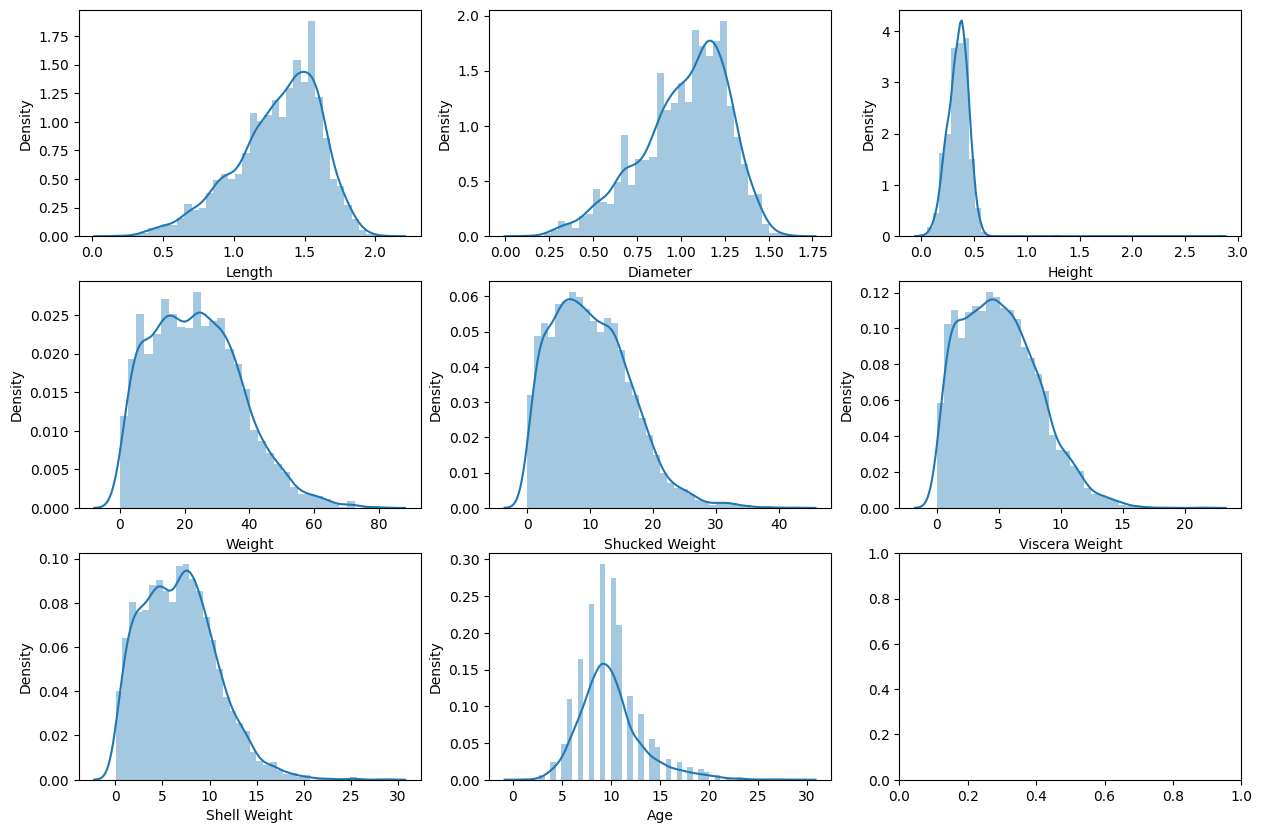

In [14]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.distplot(df["Length"], ax=axes[0, 0])
sns.distplot(df["Diameter"], ax=axes[0, 1])
sns.distplot(df["Height"], ax=axes[0, 2])
sns.distplot(df["Weight"], ax=axes[1, 0])
sns.distplot(df["Shucked Weight"], ax=axes[1, 1])
sns.distplot(df["Viscera Weight"], ax=axes[1, 2])
sns.distplot(df["Shell Weight"], ax=axes[2, 0])
sns.distplot(df["Age"], ax=axes[2, 1])
plt.show()

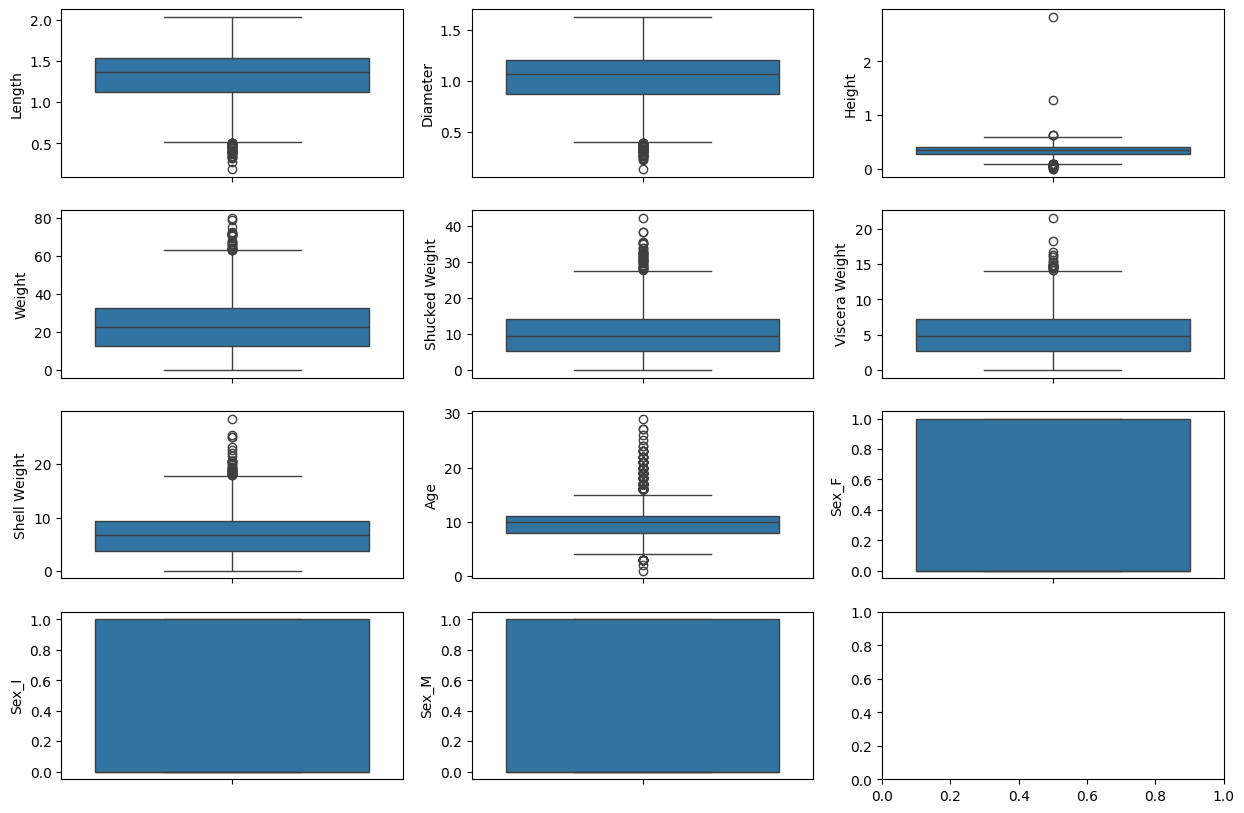

In [15]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

sns.boxplot(df["Length"], ax=axes[0, 0])
sns.boxplot(df["Diameter"], ax=axes[0, 1])
sns.boxplot(df["Height"], ax=axes[0, 2])
sns.boxplot(df["Weight"], ax=axes[1, 0])
sns.boxplot(df["Shucked Weight"], ax=axes[1, 1])
sns.boxplot(df["Viscera Weight"], ax=axes[1, 2])
sns.boxplot(df["Shell Weight"], ax=axes[2, 0])
sns.boxplot(df["Age"], ax=axes[2, 1])
sns.boxplot(df["Sex_F"], ax=axes[2, 2])
sns.boxplot(df["Sex_I"], ax=axes[3, 0])
sns.boxplot(df["Sex_M"], ax=axes[3, 1])
plt.show()

Syarat distribusi normal pada data hanya diberlakukan pada variable (Y), akan tetapi kita akan melihat sebaran data dari semua variabel. Terlihat dari histogram, bahwa variabel (Y) Age berdistribusi normal sedangkan untuk variable (X) terlihat tidak berdistribusi normal (tidak membentuk lonceng). 

Lalu untuk boxplot terlihat cukup banyak outliers yang ada sehingga kita harus melakukan handling outliers.

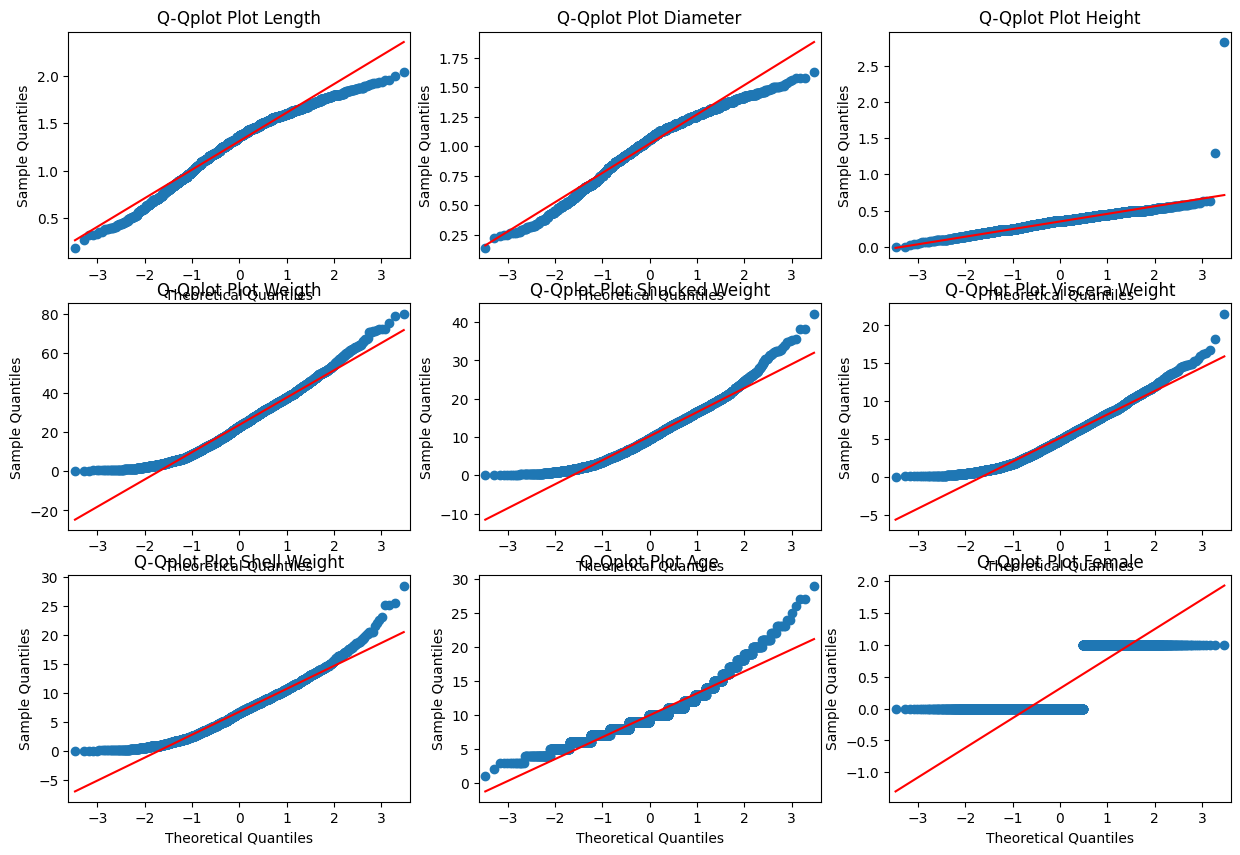

In [19]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sm.graphics.qqplot(df["Length"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Length')

sm.graphics.qqplot(df["Diameter"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Diameter')

sm.graphics.qqplot(df["Height"].dropna(), line='s', ax=axes[0, 2])
axes[0, 2].title.set_text('Q-Qplot Plot Height')

sm.graphics.qqplot(df["Weight"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot Weigth')

sm.graphics.qqplot(df["Shucked Weight"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot Shucked Weight')

sm.graphics.qqplot(df["Viscera Weight"].dropna(), line='s', ax=axes[1, 2])
axes[1, 2].title.set_text('Q-Qplot Plot Viscera Weight')

sm.graphics.qqplot(df["Shell Weight"].dropna(), line='s', ax=axes[2, 0])
axes[2, 0].title.set_text('Q-Qplot Plot Shell Weight')

sm.graphics.qqplot(df["Age"].dropna(), line='s', ax=axes[2, 1])
axes[2, 1].title.set_text('Q-Qplot Plot Age')

sm.graphics.qqplot(df["Sex_F"].dropna(), line='s', ax=axes[2, 2])
axes[2, 2].title.set_text('Q-Qplot Plot Female')

plt.show()

<h4>Uji Normalitas dengan Shapiro Wilk</h4>

H0 : data berdistribusi normal <br>H1 : data tidak berdistribusi normal</br>

In [20]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.969, p=0.000
Tolak H0, Length tidak berdistribusi normal
Statistics=0.970, p=0.000
Tolak H0, Diameter tidak berdistribusi normal
Statistics=0.882, p=0.000
Tolak H0, Height tidak berdistribusi normal
Statistics=0.973, p=0.000
Tolak H0, Weight tidak berdistribusi normal
Statistics=0.963, p=0.000
Tolak H0, Shucked Weight tidak berdistribusi normal
Statistics=0.969, p=0.000
Tolak H0, Viscera Weight tidak berdistribusi normal
Statistics=0.971, p=0.000
Tolak H0, Shell Weight tidak berdistribusi normal
Statistics=0.932, p=0.000
Tolak H0, Age tidak berdistribusi normal
Statistics=0.585, p=0.000
Tolak H0, Sex_F tidak berdistribusi normal
Statistics=0.586, p=0.000
Tolak H0, Sex_I tidak berdistribusi normal
Statistics=0.611, p=0.000
Tolak H0, Sex_M tidak berdistribusi normal


<h4>Uji Linearitas</h4>

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

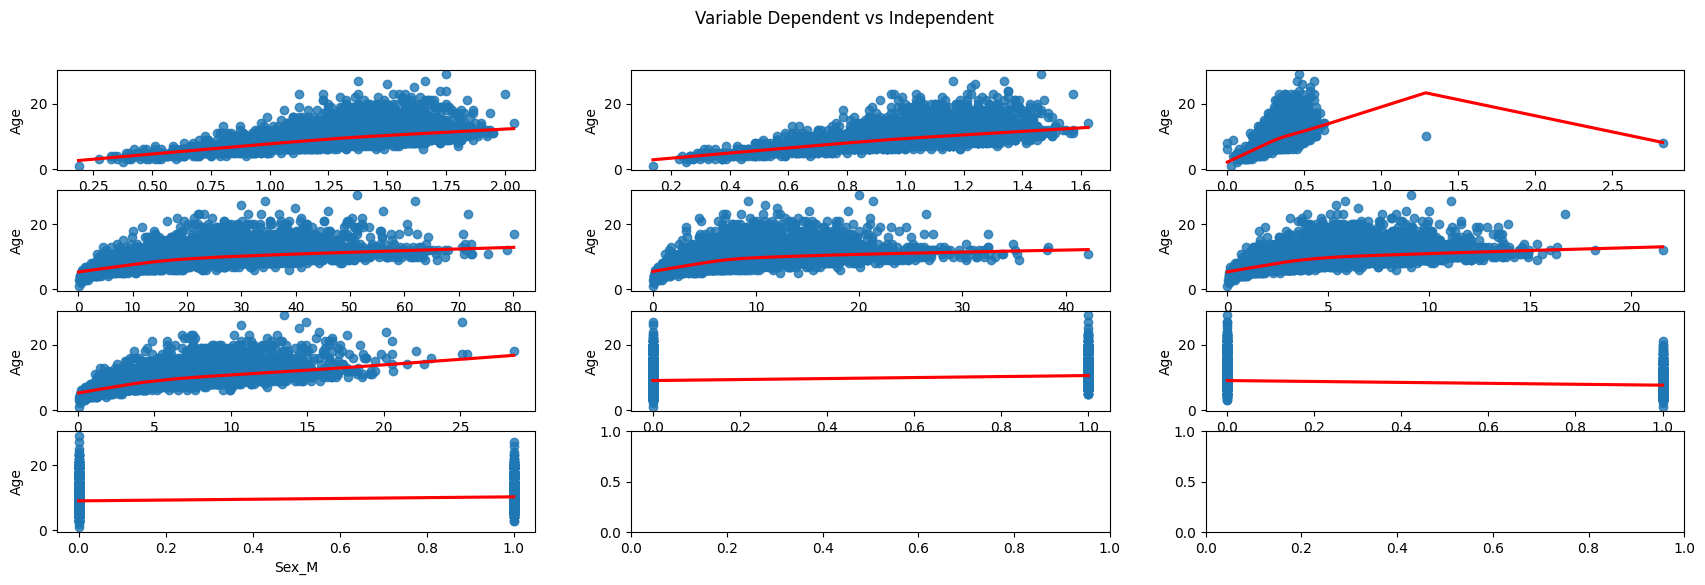

In [25]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(4, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["Length"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,0])
sns.regplot(x=df["Diameter"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,1])
sns.regplot(x=df["Height"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,2])
sns.regplot(x=df["Weight"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,0])
sns.regplot(x=df["Shucked Weight"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,1])
sns.regplot(x=df["Viscera Weight"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,2])
sns.regplot(x=df["Shell Weight"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[2,0])
sns.regplot(x=df["Sex_F"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[2,1])
sns.regplot(x=df["Sex_I"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[2,2])
sns.regplot(x=df["Sex_M"], y=df["Age"], lowess=True, line_kws={'color': 'red'}, ax=axes[3,0])
plt.show()

<h4>Uji Multikolinearitas</h4>

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda

<Axes: >

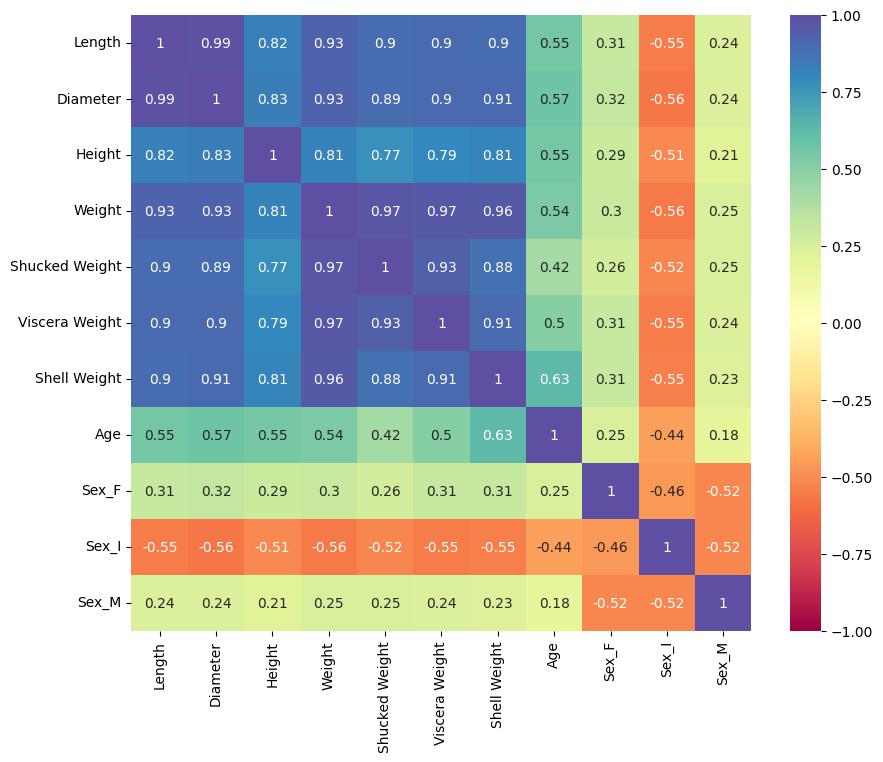

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [27]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Age"].sort_values()
korelasi

Sex_I            -0.437937
Sex_M             0.182339
Sex_F             0.249282
Shucked Weight    0.418760
Viscera Weight    0.501328
Weight            0.538819
Height            0.551956
Length            0.554973
Diameter          0.573844
Shell Weight      0.625195
Age               1.000000
Name: Age, dtype: float64

<h4>Scaling</h4>

Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.

In [29]:
# Scale data
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.18181818,  0.34615385,  0.4       , ...,  1.        ,
         0.        ,  0.        ],
       [-1.15151515, -1.26923077, -1.2       , ...,  0.        ,
         0.        ,  1.        ],
       [-0.78787879, -0.88461538, -0.9       , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.78787879, -1.84615385, -1.6       , ...,  0.        ,
         1.        ,  0.        ],
       [-0.72727273, -0.88461538, -0.8       , ...,  0.        ,
         1.        ,  0.        ],
       [-1.39393939, -1.38461538, -1.2       , ...,  0.        ,
         1.        ,  0.        ]])

In [30]:
# Membuat dataframe dari hasil scalling
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0.181818,0.346154,0.4,0.091614,0.312698,0.159375,0.015075,-0.333333,1.0,0.0,0.0
1,-1.151515,-1.269231,-1.2,-0.864693,-0.811111,-0.768750,-0.904523,-1.333333,0.0,0.0,1.0
2,-0.787879,-0.884615,-0.9,-0.737844,-0.706349,-0.718750,-0.690955,-1.333333,0.0,1.0,0.0
3,-0.454545,-0.538462,-0.9,-0.463002,-0.536508,-0.568750,-0.251256,0.000000,1.0,0.0,0.0
4,-1.151515,-1.230769,-1.2,-0.789993,-0.680952,-0.743750,-0.879397,-1.333333,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3888,0.242424,0.230769,-0.3,0.100775,0.236508,0.218750,-0.050251,-0.666667,1.0,0.0,0.0
3889,0.454545,0.461538,0.6,0.579986,0.661905,0.509375,0.552764,0.000000,1.0,0.0,0.0
3890,-1.787879,-1.846154,-1.6,-1.033122,-0.982540,-0.956250,-1.067839,-1.666667,0.0,1.0,0.0
3891,-0.727273,-0.884615,-0.8,-0.618746,-0.563492,-0.556250,-0.653266,-1.333333,0.0,1.0,0.0


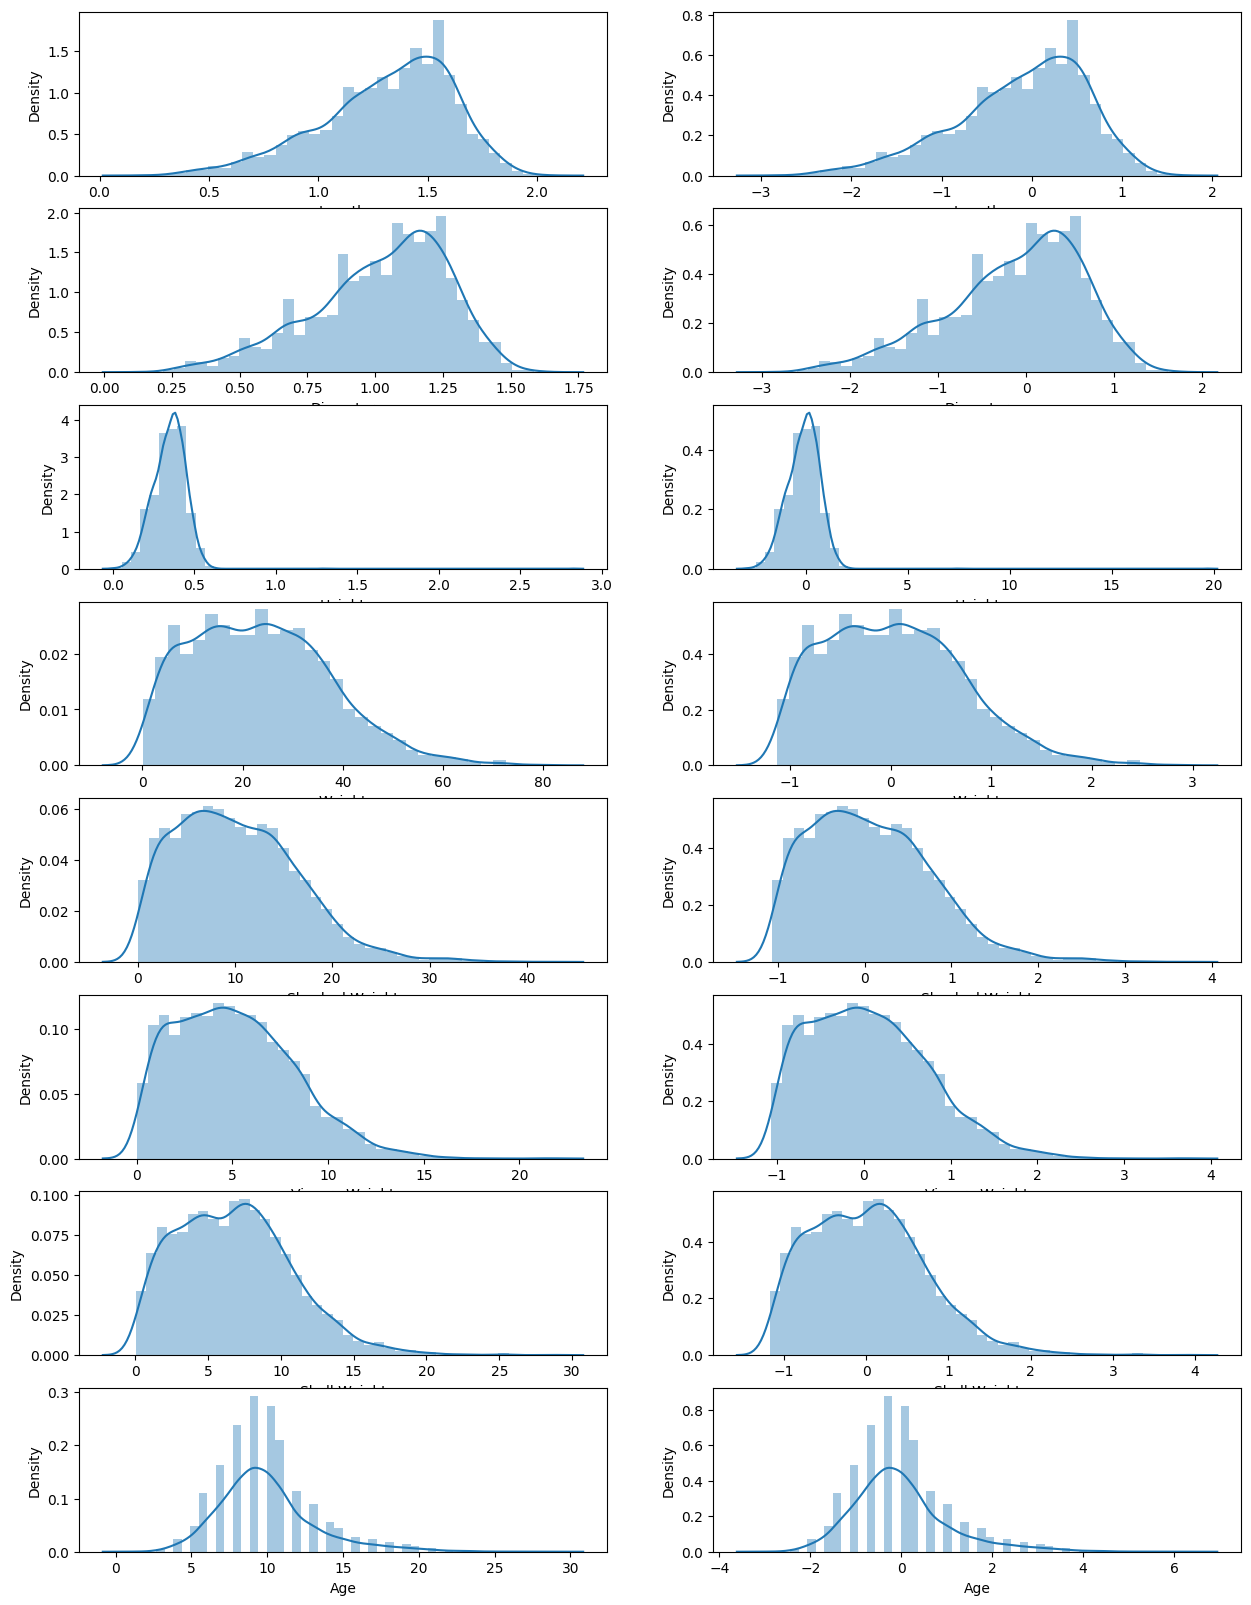

In [33]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(8, 2, figsize=(15, 20))

sns.distplot(df["Length"], ax=axes[0, 0])
sns.distplot(df_scaled["Length"], ax=axes[0, 1])
sns.distplot(df["Diameter"], ax=axes[1, 0])
sns.distplot(df_scaled["Diameter"], ax=axes[1, 1])
sns.distplot(df["Height"], ax=axes[2, 0])
sns.distplot(df_scaled["Height"], ax=axes[2, 1])
sns.distplot(df["Weight"], ax=axes[3, 0])
sns.distplot(df_scaled["Weight"], ax=axes[3, 1])
sns.distplot(df["Shucked Weight"], ax=axes[4, 0])
sns.distplot(df_scaled["Shucked Weight"], ax=axes[4, 1])
sns.distplot(df["Viscera Weight"], ax=axes[5, 0])
sns.distplot(df_scaled["Viscera Weight"], ax=axes[5, 1])
sns.distplot(df["Shell Weight"], ax=axes[6, 0])
sns.distplot(df_scaled["Shell Weight"], ax=axes[6, 1])
sns.distplot(df["Age"], ax=axes[7, 0])
sns.distplot(df_scaled["Age"], ax=axes[7, 1])
plt.show()

<h2><b>Membangun Model Regresi</b></h2>

<h4>Train Test Split</h4>

Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test

In [34]:
X = df_scaled.drop("Age", axis=1).values
y = df_scaled["Age"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [35]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  2725
Ukuran X test  1168
Ukuran y train  2725
Ukuran y test  1168


<h4>Membangun Model dengan Package Statsmodels</h4>

In [36]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [37]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [38]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     347.3
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:50:55   Log-Likelihood:                -3038.2
No. Observations:                2725   AIC:                             6096.
Df Residuals:                    2715   BIC:                             6155.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1019      0.013      7.746      0.0

In [39]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.5351689605453647
adjusted coefficient of determination: 0.5336280841714819
regression coefficients: [ 0.10191474 -0.09594841  0.54939035  0.15402492  1.60345432 -1.88038321
 -0.43556072  0.78741194  0.12911668 -0.16458623  0.13738429]


In [40]:
# membuat list
list_columns = []

for i in df.columns:
  if i != "Age":
    list_columns.append(i)

In [41]:
list_columns

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Sex_F',
 'Sex_I',
 'Sex_M']

In [42]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_age"] = y_test
df_statsmod["prediction_age"] = prediction_1
df_statsmod.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,actual_age,prediction_age
0,-1.424242,-1.461538,-1.5,-0.920366,-0.868254,-0.818750,-0.954774,0.0,1.0,0.0,-1.333333,-1.198311
1,-0.484848,-0.538462,-0.5,-0.384073,-0.203175,-0.465625,-0.479899,0.0,0.0,1.0,-0.666667,-0.495887
2,-0.666667,-0.576923,-0.5,-0.486963,-0.458730,-0.446875,-0.527638,1.0,0.0,0.0,0.333333,-0.238033
3,-0.030303,-0.230769,-0.2,-0.209302,-0.209524,-0.103125,-0.216080,0.0,1.0,0.0,-0.333333,-0.284200
4,-1.303030,-1.423077,-1.4,-0.903453,-0.831746,-0.865625,-0.939698,0.0,1.0,0.0,-1.333333,-1.182650


<h4>Uji Distribusi Residual</h4>

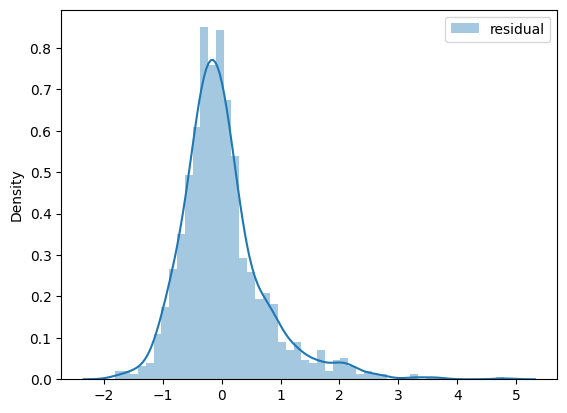

In [43]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_age'] - df_statsmod['prediction_age']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [44]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.908, p=0.000
Tolak H0, residual tidak berdistribusi normal


Dari gambar diatas, plot residual yang dihasilkan membentuk lonceng, tetapi pada pengujian normalitas dengan uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal. Sehingga dapat disimpulkan residual tidak berdistribusi normal.

In [45]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,actual_age,prediction_age,residual
0,-1.424242,-1.461538,-1.5,-0.920366,-0.868254,-0.818750,-0.954774,0.0,1.0,0.0,-1.333333,-1.198311,-0.135023
1,-0.484848,-0.538462,-0.5,-0.384073,-0.203175,-0.465625,-0.479899,0.0,0.0,1.0,-0.666667,-0.495887,-0.170780
2,-0.666667,-0.576923,-0.5,-0.486963,-0.458730,-0.446875,-0.527638,1.0,0.0,0.0,0.333333,-0.238033,0.571366
3,-0.030303,-0.230769,-0.2,-0.209302,-0.209524,-0.103125,-0.216080,0.0,1.0,0.0,-0.333333,-0.284200,-0.049133
4,-1.303030,-1.423077,-1.4,-0.903453,-0.831746,-0.865625,-0.939698,0.0,1.0,0.0,-1.333333,-1.182650,-0.150684


<h4>Plot Data Actual dan Prediction</h4>

Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut :

<function matplotlib.pyplot.show(close=None, block=None)>

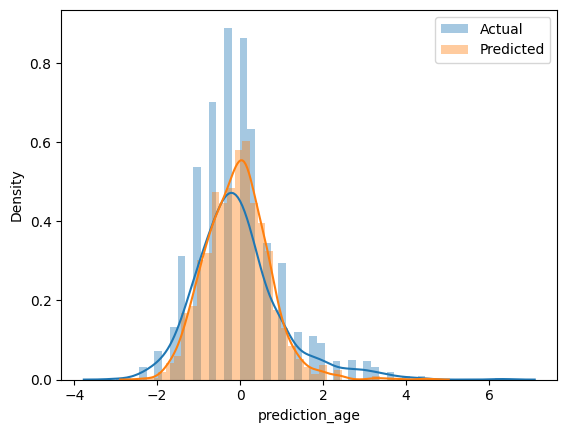

In [46]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_age'], label="Actual")
sns.distplot(df_statsmod['prediction_age'], label="Predicted")
plt.legend()
plt.show

<h4>Asumsi Autokorelasi</h4>

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.

In [47]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.051353154162876

<h4>Uji Homoskedisitas</h4>

Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi

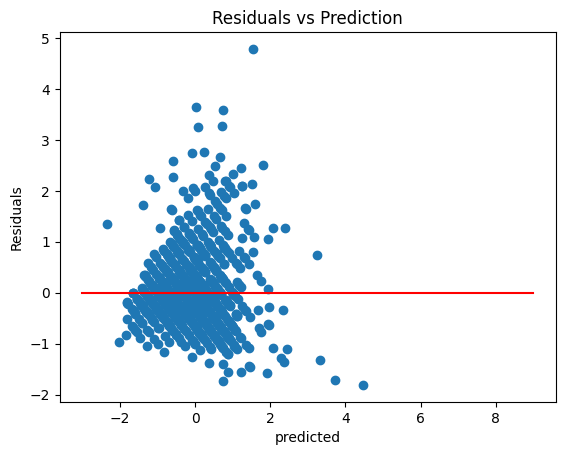

In [50]:
asm_homosk = plt.scatter(df_statsmod['prediction_age'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot(x=[-3, 9], y=[0, 0], color='red')
asm_homosk = plt.title('Residuals vs Prediction')

<h2><b>Evaluation Model</b></h2>

In [52]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_age'], df_statsmod['prediction_age']))

R-square : 0.5346511670388869


In [54]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_age'], df_statsmod['prediction_age']))

MSE : 0.5150524428103781


In [65]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(df_statsmod['actual_age'], df_statsmod['prediction_age']))
print('RMSE:', rmse)

RMSE: 0.7176715424275775


<h4>Uji Partial Analisis Regresi</h4>

Uji Parameter T-test memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [62]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5, t_test_X6, t_test_X7, t_test_X8, t_test_X9, t_test_X10 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)
print("T-test score X6: ", t_test_X6)
print("T-test score X7: ", t_test_X7)
print("T-test score X8: ", t_test_X8)
print("T-test score X9: ", t_test_X9)
print("T-test score X10: ", t_test_X10)

T-test score const:  7.746176975403407
T-test score X1:  -0.7831974548957423
T-test score X2:  4.628594677301413
T-test score X3:  5.433937491797885
T-test score X4:  7.712381239825889
T-test score X5:  -18.053645119277025
T-test score X6:  -5.077084766106019
T-test score X7:  8.542074708219715
T-test score X8:  5.769297822477819
T-test score X9:  -6.404588017552825
T-test score X10:  6.642832354281459


In [63]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5, p_value_X6, p_value_X7, p_value_X8, p_value_X9, p_value_X10 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)
print("P-value X6: ", p_value_X6)
print("P-value X7: ", p_value_X7)
print("P-value X8: ", p_value_X8)
print("P-value X9: ", p_value_X9)
print("P-value X10: ", p_value_X10)

P-value const:  1.3272650530030137e-14
P-value X1:  0.4335794804953784
P-value X2:  3.854499844529894e-06
P-value X3:  6.001689779728826e-08
P-value X4:  1.720914642799158e-14
P-value X5:  6.747877830650915e-69
P-value X6:  4.091951722701121e-07
P-value X7:  2.162338996861329e-17
P-value X8:  8.86106864568963e-09
P-value X9:  1.7708014217079123e-10
P-value X10:  3.703797105036598e-11


Diperoleh dari output diatas, bahwa P-value ketiga variabel kurang dari 0,05 sehingga Hypothesis null ditolak dan dapat disimpulkan, bahwa ketiga variabel independen (X) memberikan pengaruh secara signifikan pada variabel dependen Sale Price (Y).

<h4>Uji kelayakan model F-test</h4>

Uji kelayakan model F-test memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [64]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  347.3146643145822
P-value :  0.0
Tolak H0
